In [9]:
import pandas as pd
from datetime import datetime

#To manually create dates
time_stamp = pd.Timestamp(datetime(2017,1,1))
pd.Timestamp('2017-01-01') == time_stamp
print(time_stamp)
print(time_stamp.year)
print(time_stamp.day_name())


2017-01-01 00:00:00
2017
Sunday


Period object has freq attribute to store freq info

In [23]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
print(period.day,"days")
print(period.month,"mth")

31 days
1 mth


date arithmetic

In [1]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
print(period + 2)

2017-03


In [24]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
period.asfreq('D')

Period('2017-01-31', 'D')

Freq info enables date arithmetic

In [36]:
import pandas as pd
from datetime import datetime

#no longer supported code recommended on DataCamp
pd.Timestamp('2017-01-31', 'M') + 1


C:\Users\bookk\AppData\Local\Temp\ipykernel_18960\3979816053.py:4: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2017-01-31', 'M') + 1


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [37]:
import pandas as pd
from datetime import datetime

#replace with workable code 
pd.Period('2017-01-31', 'M') + 1


Period('2017-02', 'M')

In [35]:
import pandas as pd
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [45]:
import pandas as pd1
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
#time series can be indexed
index[0:3]


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31'], dtype='datetime64[ns]', freq='M')

In [1]:
import pandas as pd
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
#time series can be indexed to period
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

ns means nanoseconds

In [2]:
pd.DataFrame({'date': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


create 12 rows, 2 columns timestamp series

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

data = np.random.random((12,2))
pd.DataFrame(data = data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [21]:
import pandas as pd
import numpy as np
from datetime import datetime

# Create the range of dates here
seven_days = pd.date_range(start='2017-01-01', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


DateTimeIndex: Upsampling=> incr freq, downsampling=> decr freq

In [2]:
from datetime import datetime
import datetime as dt
import pandas_datareader.data as pdr
import yfinance as yf

yf.pdr_override()
#convert to datetime64
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)

google.info()

#don't create copy
google.set_index('date', inplace=True)
google.info()

#selecting/indexing strings that parse to dates
google['2015'].info() #Pass string for part of date
google['2015-3':'2016-2'].info() #Slice includes last month

#select specific stock price
google.loc['2016-6-1','price'] #Use full date with .loc[] 

#Convert DateTimeIndex to calendar day freq
google.asfreq('D').info() #set day freq

#Upsampling: higher feq => new dates => missing data
google.asfreq('D').head()

#Convert DateTimeIndex to biz day feq
google = google.asfreq('B') #Change to calendar day feq
google.info()


[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2133 entries, 2015-01-02 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2133 non-null   float64
 1   High       2133 non-null   float64
 2   Low        2133 non-null   float64
 3   Close      2133 non-null   float64
 4   Adj Close  2133 non-null   float64
 5   Volume     2133 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 116.6 KB


KeyError: "None of ['date'] are in the columns"

my code & interpretation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 184.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: fl

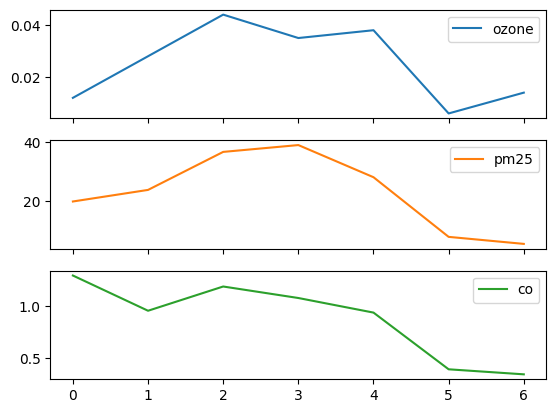

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('nyc.csv')
# Inspect data
print(data.info())
# Convert the date column to datetime64
index = pd.to_datetime(data['date'])
# Set date column as index
pd.DataFrame({'date': index}).info()

# Inspect data 
print(data.info())

# Plot data
#date = data['date']
#study = data['ozone']
#plt.plot(date, study)
data.plot(subplots=True)
plt.show()


Datacamp's code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 1999-07-01 to 1999-07-07
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   7 non-null      float64
 1   pm25    7 non-null      float64
 2   co      7 non-null      float64
dtypes: float64(3)
memory usage: 224.0 bytes
None


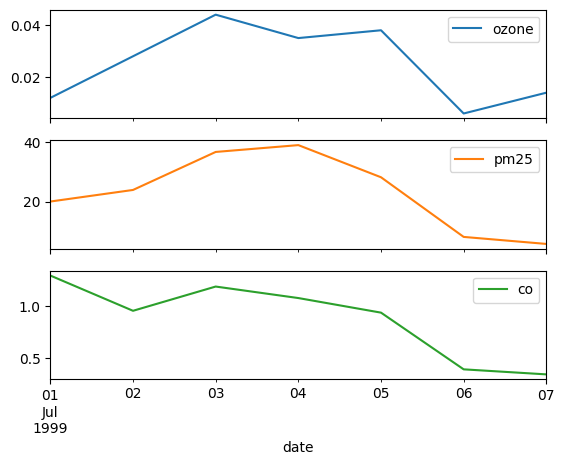

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('nyc.csv')
# Inspect data
print(data.info())
# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)
# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()


[*********************100%***********************]  1 of 1 completed


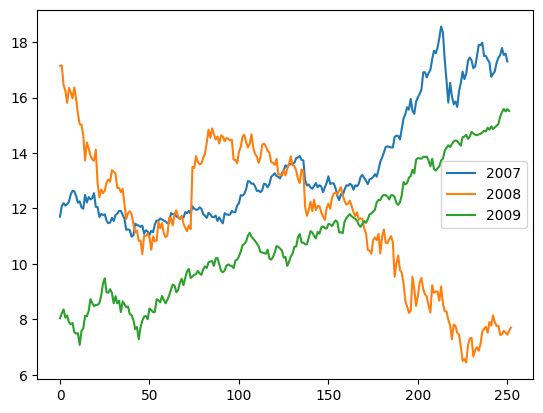

In [41]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)
google
# Create dataframe prices here
prices = pd.DataFrame()
#prices

# Select data for each year and concatenate with prices here 
for year in ['2007','2008','2009']:
    price_per_year = google.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()
